## 1. Identify the model approach(es), describe, and justify the selection

In this approach, we decided to implement Supervised Learning: Decision Trees. A decision tree is a popular method of creating and visualizing predictive models and algorithms. Starting at the top, you begin to answer questions which lead you to subsequent questions. For our purposes of making predictive models that are able to predict if a patient will be readmitted into the Vanderbilt Hospital within 30 days, this type of modeling is very efficient and useful. The goal here is to split a population of data, in our case the patient data, into smaller segments.

## 2. Code, parameterize, and run model (including visualization)

In this portion of the code is training the model. This is where the tree is built, tested, and optimized using the exisitng data from the Vanderbilt patient data. We read in the data, as you can see the print out of the first few rows of all the data, then create our X which will be a copy of the imported data, as well as y which will be the column in the y data for each patient if they were readmitted (True, or False) within 30 days of admission date. 


We first started off by doing a Decision Tree Classifier, and plot a corresponding GraphViz tree representation of the most important nodes and the tree splits based on the features deemed most important. Secondly, we perform a series of Random Forest Classifiers, and our results in the initial pass of parameter values with max features: 5, max depth: 7, and n estimators: 300, performs with an accuracy of 75% and a standard deviation of 1%. 

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd 
import pymc3 as pm
import seaborn as sns
import theano
import theano.tensor as tt
import matplotlib.pylab as plt
import matplotlib.cm as cmap
sns.set_context('talk')
import seaborn as sns; sns.set_context('notebook')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss, make_scorer
from sklearn import tree
from sklearn import model_selection
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn import model_selection
np.random.seed(1)

In [2]:
data_path = "/Users/geenaildefonso/PData/"

In [3]:
from sklearn.preprocessing import Imputer
x_data = pd.read_csv(data_path + 'x_data_final.csv', index_col= 'patient_id')
# x_data.head()
del x_data['Unnamed: 0']
# x_data = x_data[['bmi_mean',
#             'bmi_std',
#             'pd_mean',
#             'pd_std',
#             'ps_mean',
#             'ps_std',
#             'egr_mean',
#             'egfr_std',
#             'sex',
#             'race']]
attributes = ['bmi_mean',
            'bmi_std',
            'pd_mean',
            'pd_std',
            'ps_mean',
            'ps_std',
            'egr_mean',
            'egfr_std','U', 'A', 'B', 'H', 'I', 'N', 'W', 'sex_x']

# x_data.columns = attributes
x_data = x_data[['bmi_mean', 'bmi_std','pd_mean', 'pd_std', 'ps_mean', 'ps_std',
                  'egfr_mean', 'egfr_std', 'U', 'A', 'B', 'H', 'I', 'N', 'W', 'sex_x']]
x_data.head()

,bmi_mean,bmi_std,pd_mean,pd_std,ps_mean,ps_std,egfr_mean,egfr_std,U,A,B,H,I,N,W,sex_x
patient_id,,,,,,,,,,,,,,,,
50135262,0.232986,0.023394,0.343691,0.072827,0.757036,0.109282,0.468378,0.131599,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50135361,0.255530,0.358638,0.381523,0.080783,0.718633,0.119113,0.330582,0.118710,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
50135369,0.174707,0.158271,0.420444,0.071984,0.695987,0.105619,0.508748,0.089971,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
50135375,0.182953,0.014560,0.461639,0.085380,0.805206,0.144622,0.242454,0.133643,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
50135425,0.219884,0.033389,0.370948,0.060777,0.836701,0.107461,0.230223,0.211236,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
y_data = pd.read_csv(data_path + 'y_data.csv', index_col=0)

In [5]:
X = x_data.copy()
y = y_data.pop('readmitted_true')

<font color=red>PROBABLY NOT WORTHWHILE IMPLEMENTING A DECISION TREE, AS WE KNOW THEY ARE BIASED WITHOUT SOME SORT OF ENSEMBLE.</font>

We first started off by doing a Decision Tree Classifier, which is implemented in `scikit-learn` in the `DecisionTreeClassifier` class. Initially, the min_leaf_sample was set to 10, and with so many data points this was not easily readable. Therefore, we decided to change that value to 100. Using this classifier, we printed a crosstab of the actual vs. predicted values. Using this table, there was a better prediction of patients that were not readmitted within 30 days, than the prediction of patients that were readmitted and predicting that to be correct. With that, we then used `GraphViz` to plot the resulting tree from this Decision Tree Classifier. 

Overall, based on the plotted tree, we think that the split was pretty even, in the sense that there are no leaves that broke off with a small number of samples, every leave had over 100 samples split down the tree. The deepest part of the tree is 12 edges down from the beginning node. 

Secondly, we fit a series of Random Forest Classifers. **Random forests** improves upon bagging by creating a set of decision trees that are less correlated than bootstrapped trees. Classification is based on a *majority vote* of the constituent trees. We began with various values for max_features, max_depth, and n_estimators, ran the Random Forest Classifer, performed a GridSearch on the classifier against the parameters, and created a grid of best estimators. The outcome from this model predicted the best number of max_features = 5, max_depth = 7, and n_estimators = 300. 

From here, we used the best parameters from above, to implement `model_selection` in `sklearn` with 5 generated cv values, and the mean resulted in an accuracy of 75% with a standard deviation of 0.01. Given the final cross table, this Rain Forest Classifier performed a lot better than the Decision Tree Classifer, with just 9 values predicted incorrectly for patients not being readmitted and 77 values predicted incorrectly for patients being readmitted within 30 days. 

In [42]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=0.4, random_state=0)

clf = tree.DecisionTreeClassifier(criterion='entropy',
                                  max_features="auto",
                                  min_samples_leaf=100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
preds = clf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

prediction,0.0,1.0
actual,,
0.0,1964,253
1.0,582,401


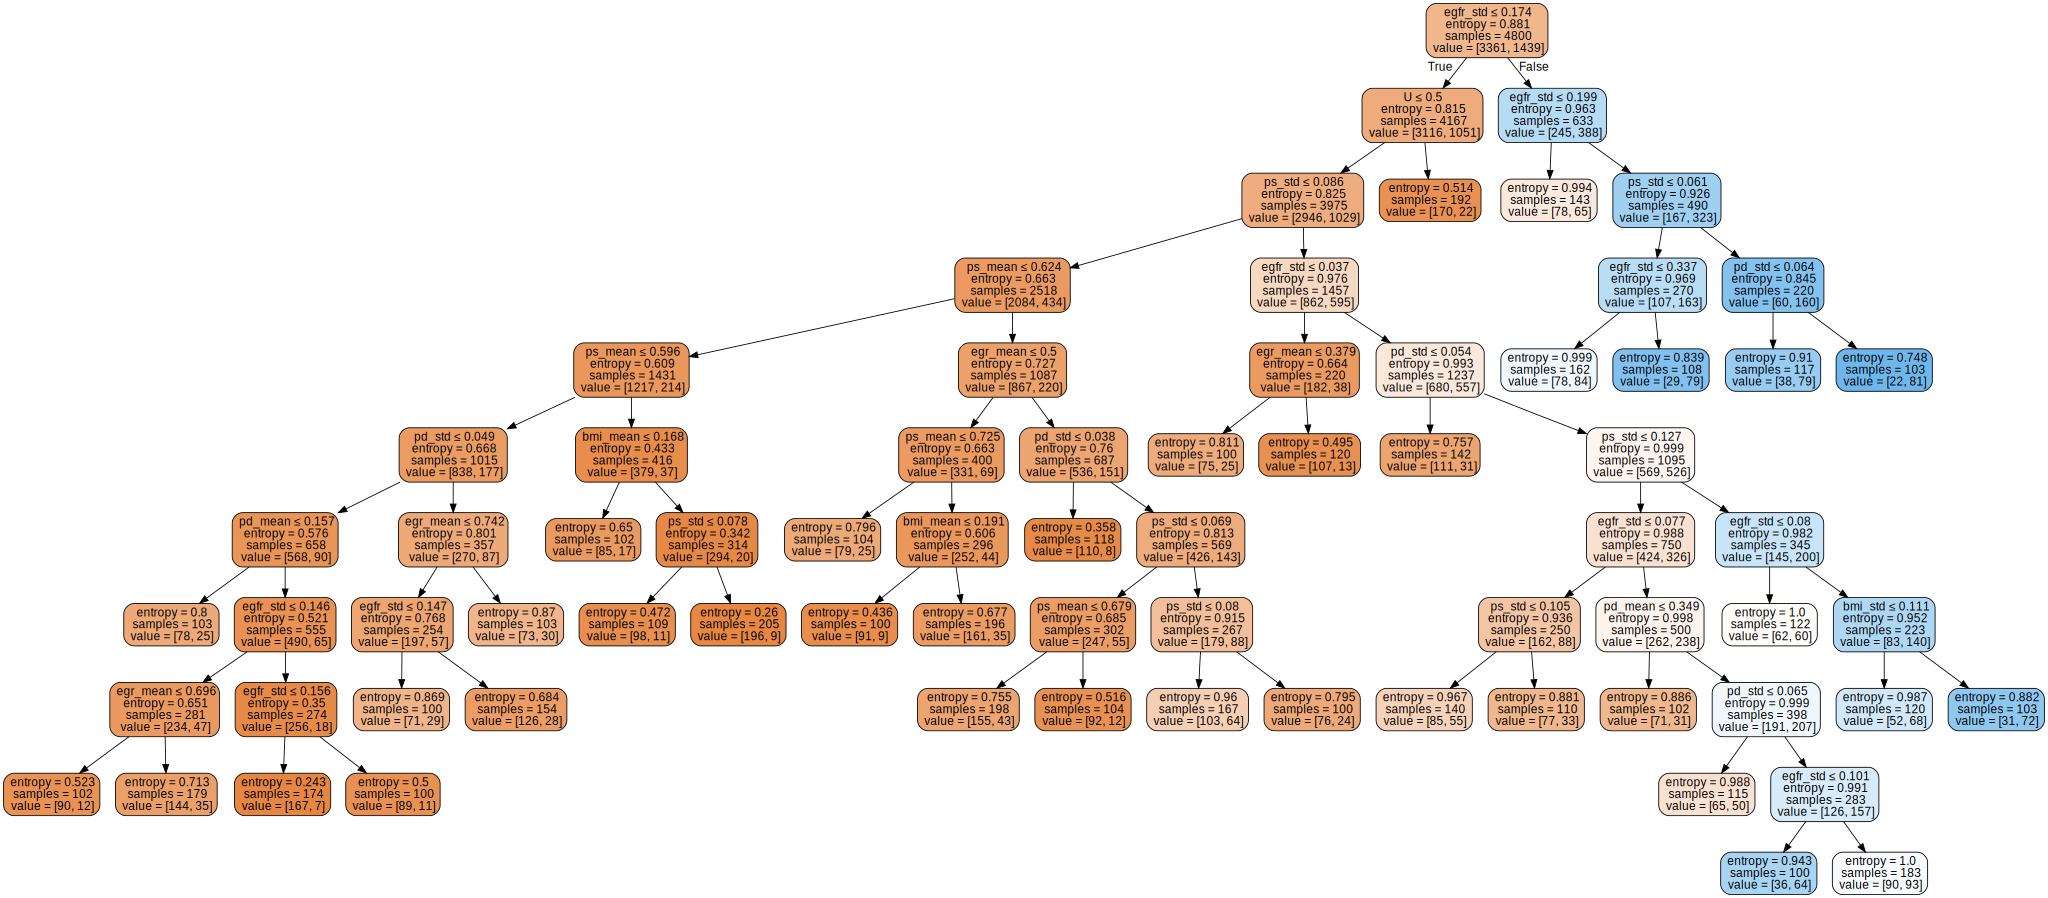

In [8]:
import graphviz
#normalized values in the tree
gv_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=attributes,  
                     filled=True, rounded=True,  
                     special_characters=True) 

graphviz.Source(gv_data)

In [9]:
# set params to search
params = {
    'max_features': [1, 3, 5, 10],
    'max_depth': [1, 5, 7, 9],
    'n_estimators': [10, 50, 300, 500]
}

# run model
rf = RandomForestClassifier()
grid = GridSearchCV(rf, params)

grid.fit(*shuffle(X, y))
best = grid.best_estimator_

print("max features: {}, max depth: {}, n estimators: {}".format(best.max_features, 
                                                                 best.max_depth, 
                                                                 best.n_estimators))

max features: 5, max depth: 7, n estimators: 300


In [10]:
best_params_rf = RandomForestClassifier(max_depth=7, max_features=5, n_estimators=300,random_state=1,n_jobs=4)
ranfor_scores = model_selection.cross_val_score(best_params_rf, X, y, cv=5)
ranfor_scores

array([ 0.74890693,  0.74453467,  0.7425    ,  0.753596  ,  0.75297061])

In [11]:
print("Accuracy: %0.2f (+/- %0.2f)" % (ranfor_scores.mean(), ranfor_scores.std() * 2))

Accuracy: 0.75 (+/- 0.01)


In [40]:
pred_train = rf.predict(X_train)

In [41]:
pd.crosstab(y_train, pred_train, 
            rownames=["Actual"], colnames=["Predicted"])

Predicted,0.0,1.0
Actual,,
0.0,3352,9
1.0,77,1362


<font color=red>THE PERFORANCE ON THE TEST SET IS MORE RELEVANT</font>

## 3. Cross-Validation 

Given the values above for max_features = 5, max_depth = 7, and n_estimators = 300, in performing a cross-validation, we tune based solely on each parameter sensitivity for the 3 parameters keeping other parameters the same when running the analysis.

First, tuning the max_features, based on the generated value above of 5 max_features and running the cross validation over a range of max feature values to test the accuracy score. Here, max_features of 5, performs the best.

Secondly, tuning the max_depth, based on the generated value above of 5 max_depth and running the cross validation over a range of max depth values to test the accuracy score. Here, max_depth of 7, perform the best.

Finally, tuning the n_estimators, based on the generated value above of 300 n_estimators and running the cross validation over a range of n_estimator values to test the accuracy score. Here, n_estimators of 100, perform the best.

<font color=red>ITS NOT QUITE CLEAR WHY YOU ARE DOING THIS. `GridSearchCV` WILL JOINTLY OPTIMIZE THEM. IF ANYTHING, YOU CAN LOOK AT FINER-GRAINED TUNING IN THE NEIGHBORHOOD OF THE VALUES DISCOVERED ABOVE, BUT STILL, YOU WOULD USE `GridSearchCV`</font>

## Tuning max_features 

In [18]:
from sklearn.model_selection import cross_val_score
max_features = np.arange(1, 10, 2)
feat_scores = [np.mean(cross_val_score(RandomForestClassifier(max_features=m, 
                                                             random_state=1, 
                                                             n_jobs=4), X, y, cv=5)) for m in max_features]

/Users/geenaildefonso/anaconda/envs/bios8366/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


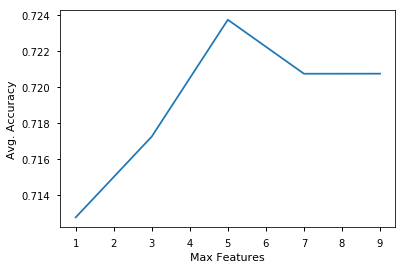

In [19]:
plt.plot(max_features, feat_scores)
plt.xlabel('Max Features')
plt.ylabel('Avg. Accuracy')
_ = plt.legend()

## Tuning max_depth

In [22]:
max_depth = np.arange(1, 10, 2)
depth_scores = [np.mean(cross_val_score(RandomForestClassifier(max_depth=m, 
                                                             random_state=1, 
                                                             n_jobs=4), X, y, cv=5)) for m in max_depth]

/Users/geenaildefonso/anaconda/envs/bios8366/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


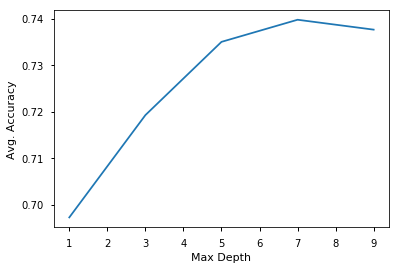

In [23]:
plt.plot(max_depth, depth_scores)
plt.xlabel('Max Depth')
plt.ylabel('Avg. Accuracy')
_ = plt.legend()

## Tuning n_estimators

In [26]:
n_estimators = np.arange(1, 100, 2)
estimator_scores = [np.mean(cross_val_score(RandomForestClassifier(n_estimators=m, 
                                                             random_state=1, 
                                                             n_jobs=4), X, y, cv=5)) for m in n_estimators]

/Users/geenaildefonso/anaconda/envs/bios8366/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


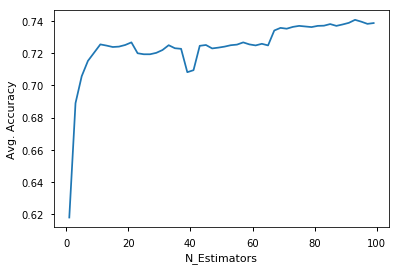

In [27]:
plt.plot(n_estimators, estimator_scores)
plt.xlabel('N_Estimators')
plt.ylabel('Avg. Accuracy')
_ = plt.legend()

## 4. Goodness of fit assessments, performance characteristics

We were interested in seeing using the Random Forest Classifier, what features were seen as most important. The feature ranking below ranked the egfr standard deviation the most important feature in the patient data. This is quite surprising to us, initially when we were discussing this, we predicted that the bmi_mean would be chosen as the most important feature, and with teh RFC that was predicted to be fairly low in comparison as the 8th most important feature out of the 16 total. It seems valid that the categorical features were predicted to have minimal importance, compared to variables that are checked regularly when you are admitted into the hospital for each patient. 

In [34]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. egfr_std (0.187692)
2. ps_std (0.140523)
3. pd_std (0.130225)
4. ps_mean (0.106682)
5. pd_mean (0.104326)
6. egfr_mean (0.102305)
7. bmi_std (0.098042)
8. bmi_mean (0.088357)
9. sex_x (0.014089)
10. W (0.009452)
11. B (0.008632)
12. U (0.003546)
13. H (0.003428)
14. A (0.001652)
15. N (0.000955)
16. I (0.000094)


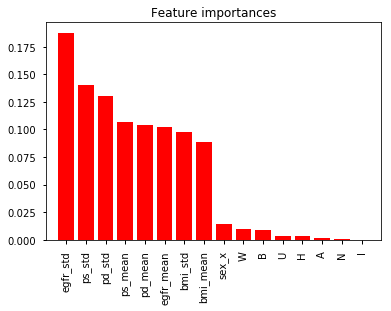

In [35]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]]);

## 5. Improvements to model/tuning of parameters; model selection methods, justification of improvements/tests

The cross-validation above gave the highest accuracy in max_features of 5, max_depth of 7, and n_estimators of 100. Using these values, we used those as the median values for choosing a best set of new parameters to be used again in the Random Forest Classifier. Interestingly, given these parameters, max_depth and n_estimators remained the same, but max_features was increased to 9. Generating 5 cv values and calculating the mean score, we do see an increase in the highest value of accuracy of 76% which performed better than the metric used above with the given parameters. 

In [29]:
# set params to search
new_params = {
    'max_features': [3,5,7,9],
    'max_depth': [5,7,9,11],
    'n_estimators': [50, 100, 150, 200]
}

# run model
rf = RandomForestClassifier()
grid = GridSearchCV(rf, new_params)

grid.fit(*shuffle(X, y))
best = grid.best_estimator_

print("max features: {}, max depth: {}, n estimators: {}".format(best.max_features, 
                                                                 best.max_depth, 
                                                                 best.n_estimators))

max features: 9, max depth: 7, n estimators: 100


In [31]:
best_params_rf = RandomForestClassifier(max_depth=7, max_features=9, n_estimators=100,random_state=1,n_jobs=4)
ranfor_scores = model_selection.cross_val_score(best_params_rf, X, y, cv=5)
ranfor_scores

array([ 0.74078701,  0.74515928,  0.741875  ,  0.753596  ,  0.76297686])

In [32]:
print("Accuracy: %0.2f (+/- %0.2f)" % (ranfor_scores.mean(), ranfor_scores.std() * 2))

Accuracy: 0.75 (+/- 0.02)


In [33]:
rf = RandomForestClassifier(n_jobs=4)
rf.fit(X_train, y_train)

preds = rf.predict(X_test)
pd.crosstab(y_test, preds, rownames=['actual'], 
            colnames=['prediction'])

prediction,0.0,1.0
actual,,
0.0,1968,249
1.0,617,366


<font color=red>IT WOULD HAVE BEEN GOOD TO SEE LEARNING CURVES, AS I ANTICIPATE YOU ARE SHORT ON VARIABLES.</font>

## 6. Comparison of models; identification of best model

In comparing the Decision Tree Classifiers, to the Random Forest Classifiers, and Cross-Validation for the Random Forest Classifier the final model of a Random Forest Classifier with max features: 9, max depth: 7, and n estimators: 100, performed best with the highest accuracy of 77%. Although, the cross table had a better prediction for the patient readmission within 30 days, as opposed to the performance of the tuned model which did not perform as well in the actual vs. predictive values. 

## 7. Results & Implications of Model

After an intial pass of using a Decision Tree Classifier, there was a poor prediction outcome in the cross table for accuracy of predicting patient readmission against the actual values. Secondly, performing a fit on a series of Random Forest Classifiers, an initial pass gave max features: 5, max depth: 7, n estimators: 300 with combined mean accuracy after 5 cv values was 75%. From there, in our cross-validation we began to tune each parameter individually and plot the accuracy percentages for a range of values for max_features, max_depth, and n_estimators. 

In assessing the performance characteristics, interestingly, using the Random Forest Classifier's feature importance, the ranking showed that egfr standard deviation turned out to be the most important feature. Similarly, in the Decision Tree Classifier the beginning node of the tree was the egfr standard deviation as well. Overall, in these models, I think that the amount of information (including variables and information in each variable) reduced the overall accuracy in being able to predict the number of patients readmitted within 30 days and being correct. 